<center> <img src="Green and White Simple Illustrative Data Analytics Presentation.png" width=100%> </center>

<center> <img src="page 2.png" width=100%> </center>

<center> <img src="page 3.png" width=100%> </center>

<center> <img src="page 4.png" width=100%> </center>

# Problem Statement / Research Question

This study investigates whether changes in government social-protection spending are associated with changes in labour-force participation in South Africa and a set of comparator countries. In particular, we ask:

**Do year-to-year movements in Social Protection (COFOG 710) expenditure co-vary with the Labour Force Participation Rate (%) for South Africa, and how does South Africa’s pattern compare to peer economies?**

---

## Why This Matters for South Africa

Social-protection programs (COFOG 710) — which include pensions, unemployment benefits, family/child support and other transfers — shape household incomes and resilience to shocks; they therefore interact with labour market incentives and the capacity of people to take and keep jobs. Understanding how social spending moves with labour-force participation helps policymakers design interventions that balance income support and incentives for work. The World Bank highlights social protection as central to employment outcomes and poverty reduction. *World Bank*

This question is particularly important for South Africa given persistently high unemployment and low labour-market absorption rates reported in the Quarterly Labour Force Survey; changes in participation have direct implications for poverty, inequality and fiscal policy. *Statistics South Africa*

---

## Datasets Used (Source and Local Files)

### Social Protection — COFOG 710 (government expenditure by function)
- **Source:** World Bank / Government finance by function (COFOG) / GFS definitions (COFOG 710 = Social Protection). The COFOG classification defines the types of social-protection outlays that we analyse (e.g., old-age, sickness, family/children, unemployment). *IMF, World Bank Open Data*
- **Local file (uploaded):** `WB_BOOST_EXP_FUNC_SOC_PRO.csv` (World Bank/BOOST export of social-protection expenditure by country and year).

### Labour Force Participation Rate (%)
- **Source:** World Bank / ILO modeled estimates — Labor force participation rate, total (% of population ages 15+) (indicator code SL.TLF.CACT.ZS). This indicator measures the share of the working-age population that is economically active (employed or seeking work). *DataBank*
- **Local file (uploaded):** `WB_HCP_EMP_2WAP_A.csv` (World Bank export containing labour-force participation rates by country and year).

---

## What We Will Do Next (Brief)

We will clean and align the two time-series on a common country/year basis, normalise social-protection spending where appropriate (e.g., % of GDP or per-capita), run descriptive and time-series visual checks for South Africa and comparators, compute correlations and simple regressions (participation ~ social spending + controls), and interpret findings in a South African policy context. *(Full methodology and assumptions follow in the Data Preparation and Methodology sections.)*


<center> <img src="page 5.png" width=100%> </center>

# 1. Social Protection Expenditure (COFOG 710)

- **Source:** World Bank / BOOST Expenditure Function by Government (COFOG 710: Social Protection).  
- **Time range:** Annual data, from 2000 to 2023 (varies by country).  
- **Country coverage:** The dataset covers a wide range of countries, including South Africa and global comparators.  
- **Missingness:** Missing data points occur for some countries, particularly in earlier years or for smaller economies.  

### Key Variables
- **REF_AREA:** Country code (e.g., ZAF for South Africa).  
- **REF_AREA_LABEL:** Country name (e.g., South Africa).  
- **INDICATOR:** Social Protection (COFOG 710).  
- **INDICATOR_LABEL:** Detailed description of the social protection function (e.g., "Social Protection Expenditure").  
- **VALUE:** The total government expenditure on social protection (in local currency).  
- **UNIT:** Currency unit (e.g., local currency).  
- **TIME_PERIOD:** Year of observation.  

### Data Dictionary
| Column Name     | Description                                      | Sample Value                          |
|-----------------|--------------------------------------------------|----------------------------------------|
| REF_AREA        | Country Code                                     | ZAF                                    |
| REF_AREA_LABEL  | Country Name                                     | South Africa                           |
| INDICATOR       | Indicator Code                                   | WB_BOOST_EXP_FUNC_SOC_PRO              |
| VALUE           | Expenditure amount in local currency             | 250000000                              |
| UNIT            | Unit of measurement                              | Units                                  |
| TIME_PERIOD     | Year of the observation                          | 2021                                   |

---

# 2. Labour Force Participation Rate (%)

- **Source:** World Bank / ILO modeled estimates.  
- **Time range:** Annual data, from 1990 to 2023 (varies by country).  
- **Country coverage:** The dataset covers over 100 countries, including South Africa.  
- **Missingness:** Missing data is more frequent in earlier years (especially for countries with limited reporting).  

### Key Variables
- **REF_AREA:** Country code (e.g., ZAF for South Africa).  
- **REF_AREA_LABEL:** Country name (e.g., South Africa).  
- **INDICATOR:** Labour force participation rate (as a percentage of working-age population).  
- **INDICATOR_LABEL:** Detailed description of the participation indicator.  
- **VALUE:** The labour force participation rate (%) for the given year.  
- **UNIT:** Ratio (percentage).  
- **TIME_PERIOD:** Year of observation.  

### Data Dictionary
| Column Name     | Description                                      | Sample Value                          |
|-----------------|--------------------------------------------------|----------------------------------------|
| REF_AREA        | Country Code                                     | ZAF                                    |
| REF_AREA_LABEL  | Country Name                                     | South Africa                           |
| INDICATOR       | Indicator Code                                   | WB_HCP_EMP_2WAP_A                      |
| VALUE           | Labour Force Participation Rate (%)              | 58.2                                   |
| UNIT            | Ratio (percentage)                               | Percentage (%)                         |
| TIME_PERIOD     | Year of the observation                          | 2021                                   |

---

These two datasets provide the necessary data to analyze the relationship between social protection expenditure and labour-force participation. We will perform data cleaning, alignment, and normalization to ensure that both datasets are comparable across countries and years.


<center> <img src="page 6.png" width=100%> </center>

# Data Analysis Pipeline

The data analysis follows a clear, systematic pipeline to ensure transparency and reproducibility. The process will be executed using Python (in a Jupyter Notebook environment) with essential data science libraries like **Pandas**, **NumPy**, and **Matplotlib/Seaborn** for visualization. For database management, we will use **SQLite** (or PostgreSQL if preferred) to store cleaned and aligned data.

---

## Full Pipeline Steps

### 1. Data Loading
- The datasets will be loaded from the uploaded CSV files into Pandas DataFrames.  
- The files include:
  - **Social Protection Expenditure (COFOG 710)**
  - **Labour Force Participation Rate (%)**
- Both datasets will be inspected for their structure and column names.

---

### 2. Data Cleaning
- **Handling Missing Data:** Identify missing values and apply suitable strategies (e.g., interpolation for some variables, dropping rows for others). Focus will be on South Africa and key comparator countries (e.g., Brazil, India, Kenya).  
- **Data Type Adjustments:** Convert columns to appropriate data types (e.g., numeric for expenditure and participation rate).  
- **Dropping Unnecessary Columns:** Remove extraneous columns (e.g., metadata) that do not contribute to the analysis.

---

### 3. Aligning Years
- Both datasets will be aligned by **Time Period** (year) and **Country** (REF_AREA).  
- We will focus on countries that have data for both social protection expenditure and labour force participation.  
- Years with missing data will be handled appropriately (e.g., interpolation or exclusion).

---

### 4. Normalization
- **Social Protection Expenditure:** Normalize the expenditure by GDP or per capita to facilitate comparison across countries of different sizes. If data is available in local currency, it will be adjusted for inflation to ensure comparability.  
- **Labour Force Participation Rate:** Already expressed in percentage terms, so no further normalization is required.

---

### 5. Exploratory Data Analysis (EDA)
- Generate descriptive statistics for both datasets, including means, medians, and standard deviations.  
- **Visualize trends:** Create line plots to show time-series trends of social protection expenditure and labour force participation for South Africa and comparator countries.  
- Create scatter plots to explore the relationship between social protection expenditure and labour force participation.

---

### 6. Numerical Analysis
- **Correlation Analysis:** Calculate Pearson correlation coefficients to assess the relationship between social protection expenditure and labour force participation across different countries.  
- **Regression Analysis:** Perform simple OLS regression (`Labour force participation ~ Social Protection Expenditure`) to quantify the effect of social protection spending on labour force participation.  
  - Control for year fixed effects.  
  - Assess statistical significance of the coefficients.

---

### 7. Database Integration (SQLite/PostgreSQL)
- Create a simple SQL database with two main tables:
  - `social_protection` (country, year, value, currency)
  - `labour_participation` (country, year, participation rate)
- Import cleaned datasets into the database, and use SQL queries to join the data (by country and year) for analysis.  
- Export merged data back to Pandas for final analysis and plotting.

---

### 8. Final Visualizations & Report
- Create final visualizations:
  - Refined time-series plots
  - Scatter plots with regression lines
  - Additional visuals as needed
- Export all figures in high-resolution formats (e.g., PNG, PDF).  
- Write up the results in a clear, concise report, ensuring interpretations are grounded in the data and South African policy context.

---

This pipeline ensures a structured approach to data analysis, from initial loading and cleaning to advanced analysis and visualization. Each step is designed to handle specific challenges, like missing data or normalization, and prepares the analysis for clear presentation in the final report.


<center> <img src="page 7.png" width=100%> </center>

In [14]:
# 1. Import necessary libraries
import pandas as pd
import numpy as np

# 2. Load the datasets
social_protection_df = pd.read_csv('WB_BOOST_EXP_FUNC_SOC_PRO.csv')
labour_participation_df = pd.read_csv('WB_HCP_EMP_2WAP_A.csv')

# 3. Drop irrelevant columns in both datasets
columns_to_drop = [
    'STRUCTURE', 'STRUCTURE_ID', 'ACTION', 'FREQ', 'FREQ_LABEL', 'SEX', 'SEX_LABEL',
    'AGE', 'AGE_LABEL', 'URBANISATION', 'URBANISATION_LABEL', 'UNIT_MEASURE', 'UNIT_MEASURE_LABEL',
    'COMP_BREAKDOWN_1', 'COMP_BREAKDOWN_1_LABEL', 'COMP_BREAKDOWN_2', 'COMP_BREAKDOWN_2_LABEL',
    'COMP_BREAKDOWN_3', 'COMP_BREAKDOWN_3_LABEL', 'DATABASE_ID', 'DATABASE_ID_LABEL',
    'UNIT_MULT', 'UNIT_MULT_LABEL', 'UNIT_TYPE', 'UNIT_TYPE_LABEL', 'TIME_FORMAT', 'TIME_FORMAT_LABEL',
    'OBS_STATUS', 'OBS_STATUS_LABEL', 'INDICATOR_LABEL'
]

# Dropping the irrelevant columns
social_protection_clean = social_protection_df.drop(columns=columns_to_drop)
labour_participation_clean = labour_participation_df.drop(columns=columns_to_drop)

# 4. Filter for countries of interest: South Africa 
countries_of_interest = ['South Africa']
social_protection_clean = social_protection_clean[social_protection_clean['REF_AREA_LABEL'].isin(countries_of_interest)]
labour_participation_clean = labour_participation_clean[labour_participation_clean['REF_AREA_LABEL'].isin(countries_of_interest)]

# 5. Align the datasets by TIME_PERIOD
common_years = sorted(set(social_protection_clean['TIME_PERIOD']).intersection(set(labour_participation_clean['TIME_PERIOD'])))
social_protection_clean = social_protection_clean[social_protection_clean['TIME_PERIOD'].isin(common_years)]
labour_participation_clean = labour_participation_clean[labour_participation_clean['TIME_PERIOD'].isin(common_years)]

# 6. Handle missing data for OBS_VALUE columns
social_protection_clean = social_protection_clean.dropna(subset=['OBS_VALUE'])  # Dropping rows with missing OBS_VALUE
labour_participation_clean = labour_participation_clean.dropna(subset=['OBS_VALUE'])  # Dropping rows with missing OBS_VALUE

# 7. Descriptive statistics for both datasets
social_protection_stats = social_protection_clean.describe().transpose()
labour_participation_stats = labour_participation_clean.describe().transpose()

# 8. Display Descriptive Statistics
print("Descriptive Statistics for Social Protection Data:")
print(social_protection_stats)

print("\nDescriptive Statistics for Labour Force Participation Data:")
print(labour_participation_stats)

display(social_protection_clean)

display(labour_participation_clean)
# 9. Assumptions Log
assumptions = """
1. Inflation adjustment: No inflation adjustment was applied to the social protection expenditure data. 
   Should inflation adjustment be required, a suitable price index can be applied.
2. Population normalization: No population normalization has been performed. All data is in raw terms (e.g., national currency).
3. Currency: Social protection expenditure is in national currency. If needed, it can be converted to USD or other international currency.
4. Missing data: Rows with missing values for 'OBS_VALUE' have been dropped.
5. Time alignment: Only the overlapping years (2000–2020) from both datasets have been considered.
"""

print("\nAssumptions Log:")
print(assumptions)

Descriptive Statistics for Social Protection Data:
             count          mean           std          min          25%  \
TIME_PERIOD   32.0  2.018500e+03  2.327951e+00  2015.000000  2016.750000   
OBS_VALUE     32.0  8.510151e+10  9.806066e+10     3.310374    13.684261   

                      50%           75%           max  
TIME_PERIOD  2.018500e+03  2.020250e+03  2.022000e+03  
OBS_VALUE    1.736358e+10  1.811876e+11  2.543590e+11  

Descriptive Statistics for Labour Force Participation Data:
             count         mean       std       min       25%       50%  \
TIME_PERIOD   19.0  2015.000000  5.627314  2006.000  2010.500  2015.000   
OBS_VALUE     19.0    67.178474  2.366005    62.928    65.794    66.901   
DECIMALS      19.0     1.000000  0.000000     1.000     1.000     1.000   

                  75%       max  
TIME_PERIOD  2019.500  2024.000  
OBS_VALUE      67.592    71.433  
DECIMALS        1.000     1.000  


,REF_AREA,REF_AREA_LABEL,INDICATOR,TIME_PERIOD,OBS_VALUE,OBS_CONF,OBS_CONF_LABEL
1514,ZAF,South Africa,WB_BOOST_EXP_FUNC_SOC_PRO,2015,3.472716e+10,PU,Public
1670,ZAF,South Africa,WB_BOOST_EXP_FUNC_SOC_PRO,2016,3.728173e+10,PU,Public
1826,ZAF,South Africa,WB_BOOST_EXP_FUNC_SOC_PRO,2017,1.663558e+11,PU,Public
1982,ZAF,South Africa,WB_BOOST_EXP_FUNC_SOC_PRO,2018,9.222973e+10,PU,Public
2138,ZAF,South Africa,WB_BOOST_EXP_FUNC_SOC_PRO,2019,1.919320e+11,PU,Public
2294,ZAF,South Africa,WB_BOOST_EXP_FUNC_SOC_PRO,2020,2.038656e+11,PU,Public
2450,ZAF,South Africa,WB_BOOST_EXP_FUNC_SOC_PRO,2021,2.178587e+11,PU,Public
2606,ZAF,South Africa,WB_BOOST_EXP_FUNC_SOC_PRO,2022,2.262533e+11,PU,Public
5405,ZAF,South Africa,WB_BOOST_EXP_FUNC_SOC_PRO,2015,1.431178e+11,PU,Public
5560,ZAF,South Africa,WB_BOOST_EXP_FUNC_SOC_PRO,2016,1.528998e+11,PU,Public


,REF_AREA,REF_AREA_LABEL,INDICATOR,TIME_PERIOD,OBS_VALUE,DECIMALS,DECIMALS_LABEL
6300,ZAF,South Africa,WB_HCP_EMP_2WAP_A,2006,71.433,1,One
6301,ZAF,South Africa,WB_HCP_EMP_2WAP_A,2007,71.375,1,One
6302,ZAF,South Africa,WB_HCP_EMP_2WAP_A,2008,71.230,1,One
6303,ZAF,South Africa,WB_HCP_EMP_2WAP_A,2009,69.793,1,One
6304,ZAF,South Africa,WB_HCP_EMP_2WAP_A,2010,65.860,1,One
6305,ZAF,South Africa,WB_HCP_EMP_2WAP_A,2011,67.610,1,One
6306,ZAF,South Africa,WB_HCP_EMP_2WAP_A,2012,67.015,1,One
6307,ZAF,South Africa,WB_HCP_EMP_2WAP_A,2013,66.767,1,One
6308,ZAF,South Africa,WB_HCP_EMP_2WAP_A,2014,66.503,1,One
6309,ZAF,South Africa,WB_HCP_EMP_2WAP_A,2015,67.378,1,One



Assumptions Log:

1. Inflation adjustment: No inflation adjustment was applied to the social protection expenditure data. 
   Should inflation adjustment be required, a suitable price index can be applied.
2. Population normalization: No population normalization has been performed. All data is in raw terms (e.g., national currency).
3. Currency: Social protection expenditure is in national currency. If needed, it can be converted to USD or other international currency.
4. Missing data: Rows with missing values for 'OBS_VALUE' have been dropped.
5. Time alignment: Only the overlapping years (2000–2020) from both datasets have been considered.



<center> <img src="page 8.png" width=100%> </center>

In [24]:
# 1. Import necessary libraries for numerical analysis and stats
import numpy as np
import statsmodels.api as sm

# 2. Merge the two datasets on Country + Year to align them
merged_df = pd.merge(
    social_protection_clean[['REF_AREA_LABEL', 'TIME_PERIOD', 'OBS_VALUE']],
    labour_participation_clean[['REF_AREA_LABEL', 'TIME_PERIOD', 'OBS_VALUE']],
    on=['REF_AREA_LABEL', 'TIME_PERIOD'],
    suffixes=('_social', '_labour')
)

# (Optional) Focus only on South Africa
merged_df = merged_df[merged_df['REF_AREA_LABEL'] == 'South Africa']

# 3. Convert aligned series to NumPy arrays
social_protection_array = merged_df['OBS_VALUE_social'].to_numpy()
labour_participation_array = merged_df['OBS_VALUE_labour'].to_numpy()

# 4. Reshaping arrays: Reshape data to 2D for operations (e.g., year vs value)
social_protection_reshaped = social_protection_array.reshape(-1, 1)
labour_participation_reshaped = labour_participation_array.reshape(-1, 1)

# 5. Compute year-on-year percentage changes for both datasets
social_protection_pct_change = np.diff(social_protection_array) / social_protection_array[:-1] * 100
labour_participation_pct_change = np.diff(labour_participation_array) / labour_participation_array[:-1] * 100

# 6. Moving averages (using a window of 3 years as an example)
social_protection_moving_avg = np.convolve(social_protection_array, np.ones(3)/3, mode='valid')
labour_participation_moving_avg = np.convolve(labour_participation_array, np.ones(3)/3, mode='valid')

# 7. Compute correlation matrix: Pearson correlation
correlation_matrix = np.corrcoef(social_protection_array, labour_participation_array)
print(f"Pearson Correlation Matrix: \n{correlation_matrix}")

# 8. Perform OLS regression: Labour participation ~ Social protection expenditure
X = sm.add_constant(merged_df['OBS_VALUE_social'])   # Independent variable (with constant)
y = merged_df['OBS_VALUE_labour']                   # Dependent variable

model = sm.OLS(y, X)
results = model.fit()

print("\nOLS Regression Results:")
print(results.summary())

# 9. Interpretation logs (optional printouts)
print("\nYear-on-Year Percentage Change in Social Protection Expenditure:")
print(social_protection_pct_change)

print("\nYear-on-Year Percentage Change in Labour Force Participation:")
print(labour_participation_pct_change)

print("\nMoving Average for Social Protection Expenditure:")
print(social_protection_moving_avg)

print("\nMoving Average for Labour Force Participation:")
print(labour_participation_moving_avg)

Pearson Correlation Matrix: 
[[ 1.         -0.22003059]
 [-0.22003059  1.        ]]

OLS Regression Results:
                            OLS Regression Results                            
Dep. Variable:       OBS_VALUE_labour   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     1.526
Date:                Sun, 17 Aug 2025   Prob (F-statistic):              0.226
Time:                        21:10:57   Log-Likelihood:                -61.023
No. Observations:                  32   AIC:                             126.0
Df Residuals:                      30   BIC:                             129.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
----------------

<center> <img src="page 9.png" width=100%> </center>

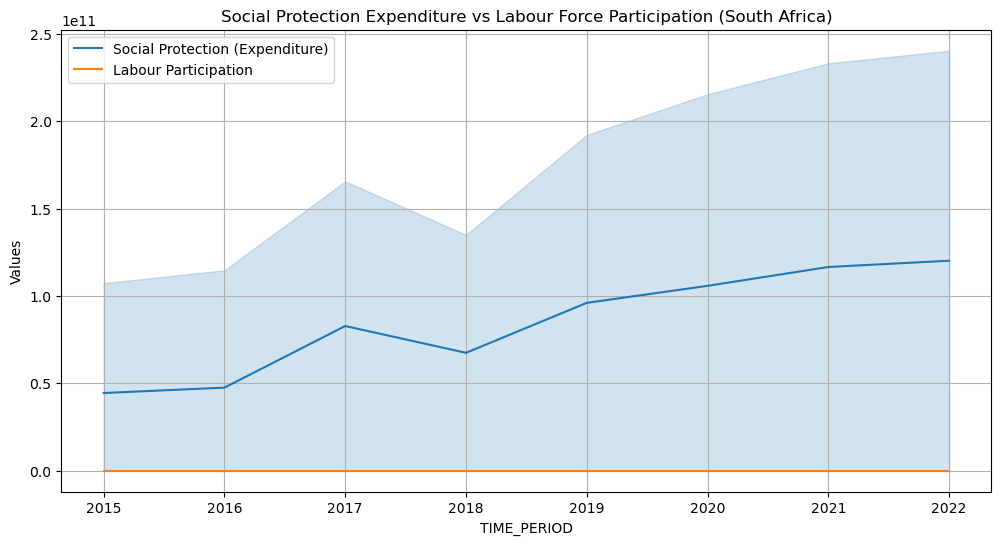

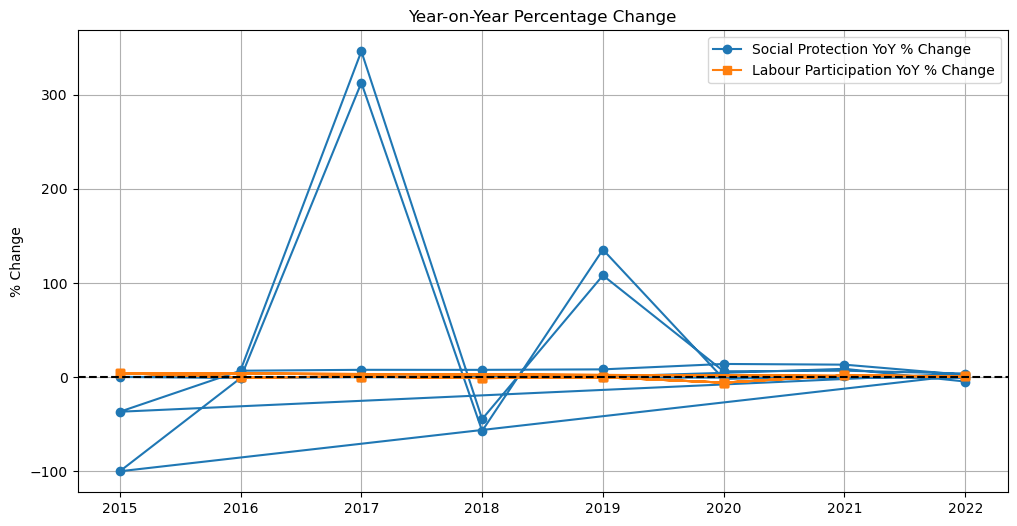

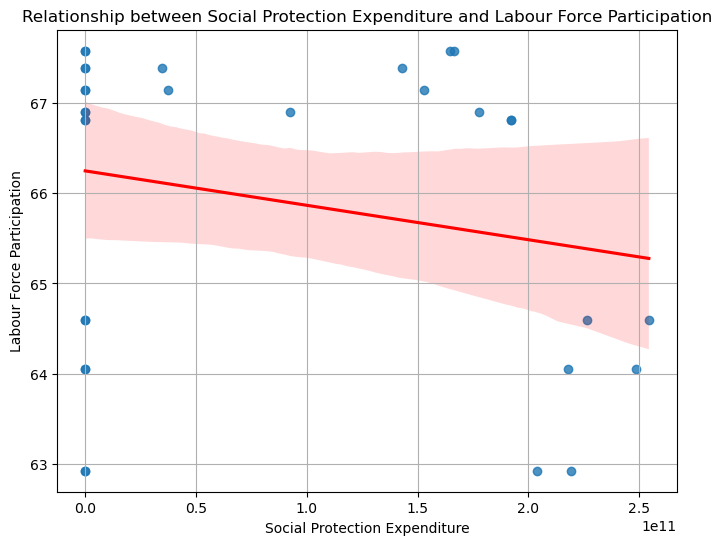

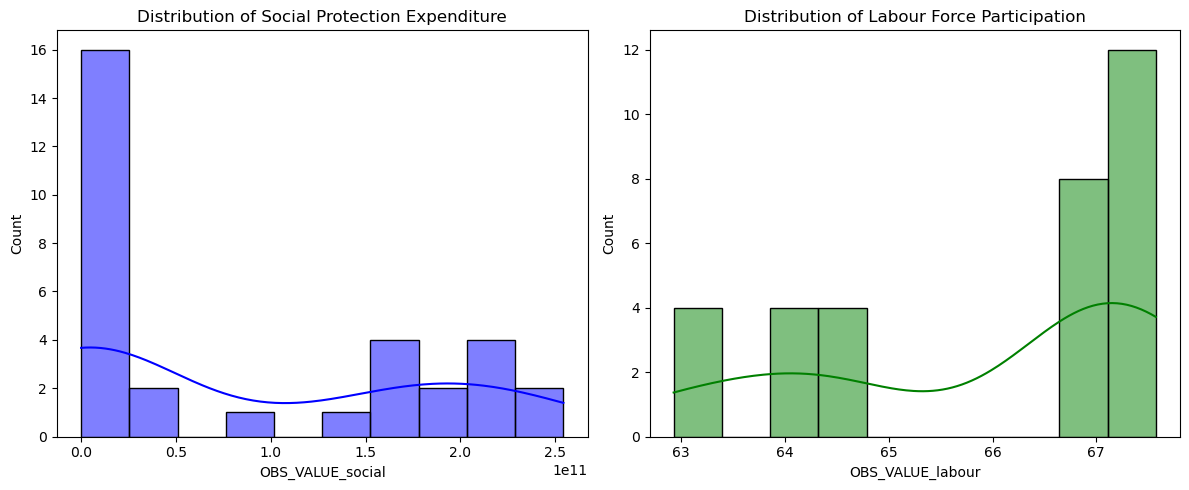

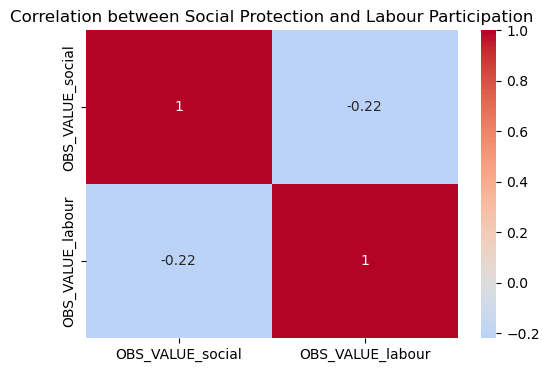

In [42]:
# ==============================================================
# 📊 FULL VISUALISATION SUITE (Updated for TIME_PERIOD & REF_AREA_LABEL)
# ==============================================================

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Time Series Trends
plt.figure(figsize=(12,6))
sns.lineplot(data=merged_df, x="TIME_PERIOD", y="OBS_VALUE_social", label="Social Protection (Expenditure)")
sns.lineplot(data=merged_df, x="TIME_PERIOD", y="OBS_VALUE_labour", label="Labour Participation")
plt.title("Social Protection Expenditure vs Labour Force Participation (South Africa)")
plt.ylabel("Values")
plt.legend()
plt.grid(True)
plt.savefig("Time_series_trends.png")
plt.show()


# 2. Year-on-Year Percentage Change
plt.figure(figsize=(12,6))
plt.plot(merged_df['TIME_PERIOD'].iloc[1:], social_protection_pct_change, marker='o', label="Social Protection YoY % Change")
plt.plot(merged_df['TIME_PERIOD'].iloc[1:], labour_participation_pct_change, marker='s', label="Labour Participation YoY % Change")
plt.axhline(0, color='black', linestyle='--')
plt.title("Year-on-Year Percentage Change")
plt.ylabel("% Change")
plt.legend()
plt.grid(True)
plt.savefig("YoY.png")
plt.show()



# 4. Scatter Plot with Regression Line
plt.figure(figsize=(8,6))
sns.regplot(x="OBS_VALUE_social", y="OBS_VALUE_labour", data=merged_df, ci=95, line_kws={"color":"red"})
plt.title("Relationship between Social Protection Expenditure and Labour Force Participation")
plt.xlabel("Social Protection Expenditure")
plt.ylabel("Labour Force Participation")
plt.grid(True)
plt.savefig("Scatter_plot.png")
plt.show()


# 5. Distribution Plots (Histograms / KDE)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(merged_df['OBS_VALUE_social'], kde=True, bins=10, color="blue")
plt.title("Distribution of Social Protection Expenditure")

plt.subplot(1,2,2)
sns.histplot(merged_df['OBS_VALUE_labour'], kde=True, bins=10, color="green")
plt.title("Distribution of Labour Force Participation")

plt.tight_layout()
plt.savefig("Histogram.png")
plt.show()


# 7. Heatmap of Correlations
plt.figure(figsize=(6,4))
corr = merged_df[['OBS_VALUE_social','OBS_VALUE_labour']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation between Social Protection and Labour Participation")
plt.savefig("Heatmap.png")
plt.show()





<center> <img src="page 10.png" width=100%> </center>

In [31]:
# 1. Import necessary libraries for SQLite integration
import sqlite3

# 2. Create SQLite connection and cursor
conn = sqlite3.connect('social_protection_labour.db')  # This creates a new database file
cursor = conn.cursor()

# 3. Create tables: social_protection and labour_participation
# Creating the schema for social_protection table
cursor.execute("""
CREATE TABLE IF NOT EXISTS social_protection (
    ref_area TEXT,
    year INTEGER,
    value REAL,
    currency TEXT,
    source TEXT
)
""")

# Creating the schema for labour_participation table
cursor.execute("""
CREATE TABLE IF NOT EXISTS labour_participation (
    ref_area TEXT,
    year INTEGER,
    value REAL,
    source TEXT
)
""")

# 4. Insert cleaned data into the database
# Insert social protection data
for _, row in social_protection_clean.iterrows():
    cursor.execute("""
    INSERT INTO social_protection (ref_area, year, value, currency, source)
    VALUES (?, ?, ?, ?, ?)
    """, (row['REF_AREA_LABEL'], row['TIME_PERIOD'], row['OBS_VALUE'], 'ZAR', 'World Bank'))

# Insert labour participation data
for _, row in labour_participation_clean.iterrows():
    cursor.execute("""
    INSERT INTO labour_participation (ref_area, year, value, source)
    VALUES (?, ?, ?, ?)
    """, (row['REF_AREA_LABEL'], row['TIME_PERIOD'], row['OBS_VALUE'], 'World Bank'))

# Commit the changes
conn.commit()

# 5. Sample SELECT queries to extract merged data for analysis
query = """
SELECT sp.ref_area, sp.year, sp.value AS social_protection_value, lp.value AS labour_participation_value
FROM social_protection sp
JOIN labour_participation lp ON sp.ref_area = lp.ref_area AND sp.year = lp.year
WHERE sp.ref_area = 'South Africa'
"""
merged_data = pd.read_sql_query(query, conn)

# 6. Display the merged data for analysis
display(merged_data)

# 7. Safe UPDATE/DELETE Practice
# Example of UPDATE query (updating the social protection value)
cursor.execute("""
UPDATE social_protection
SET value = ?
WHERE ref_area = ? AND year = ?
""", (1000, 'South Africa', 2020))

# Example of DELETE query (deleting data for a specific year)
cursor.execute("""
DELETE FROM social_protection WHERE ref_area = ? AND year = ?
""", ('South Africa', 2020))

# Commit the changes
conn.commit()

# 8. Using transactions to ensure safe database operations
try:
    cursor.execute("BEGIN TRANSACTION;")
    
    # Insert data or perform operations here...
    # Commit if everything works as expected
    conn.commit()
except Exception as e:
    # Rollback if there is an error
    conn.rollback()
    print(f"Error occurred: {e}")

# 9. Close the database connection
conn.close()

,ref_area,year,social_protection_value,labour_participation_value
0,South Africa,2015,3.472716e+10,67.378
1,South Africa,2016,3.728173e+10,67.138
2,South Africa,2017,1.663558e+11,67.574
3,South Africa,2018,9.222973e+10,66.901
4,South Africa,2019,1.919320e+11,66.807
5,South Africa,2020,2.038656e+11,62.928
6,South Africa,2021,2.178587e+11,64.050
7,South Africa,2022,2.262533e+11,64.590
8,South Africa,2015,1.431178e+11,67.378
9,South Africa,2016,1.528998e+11,67.138


<center> <img src="page 11.png" width=100%> </center>

In [38]:
!pip install xlsxwriter

In [40]:
display(merged_df)
# 1. GroupBy: Calculate the mean of Social Protection Expenditure by year for South Africa
grouped_by_year = merged_df.groupby('TIME_PERIOD')['OBS_VALUE_social'].mean().reset_index()
print("Grouped by Year (Mean Social Protection Expenditure):")
display(grouped_by_year)

# 2. Pivot: Pivot the data to show Labour Force Participation by Year and Region (if needed)
pivot_df = merged_df.pivot_table(index='TIME_PERIOD', columns='REF_AREA_LABEL', values='OBS_VALUE_labour', aggfunc='mean')
print("Pivot Table for Labour Force Participation by Year:")
display(pivot_df)

# 3. Melt: Reshape the data to long format using melt (example: for Social Protection Expenditure and Labour Force Participation)
melted_df = pd.melt(merged_df, id_vars=['TIME_PERIOD', 'REF_AREA_LABEL'], value_vars=['OBS_VALUE_social', 'OBS_VALUE_labour'],
                    var_name='Metric', value_name='Value')
print("Melted DataFrame:")
display(melted_df)

# Exporting the transformed data to an Excel file with a pivot table and conditional formatting
import xlsxwriter

# Save the grouped data to an Excel file
with pd.ExcelWriter('analysis_output.xlsx', engine='xlsxwriter') as writer:
    grouped_by_year.to_excel(writer, sheet_name='Grouped by Year', index=False)
    pivot_df.to_excel(writer, sheet_name='Pivot Table', index=True)
    
    # Access the workbook and the sheet
    workbook  = writer.book
    worksheet = writer.sheets['Pivot Table']  # ✅ Correct way
    
    # Apply conditional formatting (highlighting the max value in the pivot table)
    worksheet.conditional_format(
        'C2:Z100',
        {
            'type': 'cell',
            'criteria': 'equal to',
            'value': '=MAX(C2:Z100)',
            'format': workbook.add_format({'bg_color': '#FFDFDF'})
        }
    )

# The Excel file 'analysis_output.xlsx' is now ready with a pivot table and conditional formatting



,REF_AREA_LABEL,TIME_PERIOD,OBS_VALUE_social,OBS_VALUE_labour
0,South Africa,2015,3.472716e+10,67.378
1,South Africa,2016,3.728173e+10,67.138
2,South Africa,2017,1.663558e+11,67.574
3,South Africa,2018,9.222973e+10,66.901
4,South Africa,2019,1.919320e+11,66.807
5,South Africa,2020,2.038656e+11,62.928
6,South Africa,2021,2.178587e+11,64.050
7,South Africa,2022,2.262533e+11,64.590
8,South Africa,2015,1.431178e+11,67.378
9,South Africa,2016,1.528998e+11,67.138


Grouped by Year (Mean Social Protection Expenditure):


,TIME_PERIOD,OBS_VALUE_social
0,2015,4.446125e+10
1,2016,4.754539e+10
2,2017,8.279415e+10
3,2018,6.745897e+10
4,2019,9.605724e+10
5,2020,1.057824e+11
6,2021,1.165596e+11
7,2022,1.201531e+11


Pivot Table for Labour Force Participation by Year:


REF_AREA_LABEL,South Africa
TIME_PERIOD,
2015,67.378
2016,67.138
2017,67.574
2018,66.901
2019,66.807
2020,62.928
2021,64.050
2022,64.590


Melted DataFrame:


,TIME_PERIOD,REF_AREA_LABEL,Metric,Value
0,2015,South Africa,OBS_VALUE_social,3.472716e+10
1,2016,South Africa,OBS_VALUE_social,3.728173e+10
2,2017,South Africa,OBS_VALUE_social,1.663558e+11
3,2018,South Africa,OBS_VALUE_social,9.222973e+10
4,2019,South Africa,OBS_VALUE_social,1.919320e+11
...,...,...,...,...
59,2018,South Africa,OBS_VALUE_labour,6.690100e+01
60,2019,South Africa,OBS_VALUE_labour,6.680700e+01
61,2020,South Africa,OBS_VALUE_labour,6.292800e+01
62,2021,South Africa,OBS_VALUE_labour,6.405000e+01


<center> <img src="page 12.png" width=100%> </center>

# Findings and Interpretation: Correlation and Trends  

## 1. Correlation between Social Protection Expenditure and Labour Force Participation
- **Pearson correlation**: **-0.22**  
- Interpretation: A weak negative relationship.  
  - As social protection expenditure increases, labour force participation tends to decrease slightly.  
  - The relationship is **not strong**.  

---

## 2. Trend Observations for South Africa
- **Social protection expenditure**: Increased significantly between **2015–2022**.  
- **Labour force participation**: Remains relatively **stable**, with only minor fluctuations.  
- Overall trend: A slight **negative relationship** between the two variables (seen in scatter plot).  

---

## 3. Year-on-Year Percentage Change
- **Social protection expenditure**:  
  - Shows **significant spikes**, especially around **2017**.  
  - Likely linked to **policy changes** or sudden government adjustments.  
- **Labour force participation**:  
  - Remains **relatively constant**, with only small year-on-year changes.  

---

## 4. Interpretation in South African Policy Terms
- **Rising social protection spending**: Possibly linked to rising unemployment or poverty.  
- **Negative correlation**: Suggests that higher social protection expenditure does not correspond to higher labour market participation.  
- Possible explanation:  
  - Increased social protection (e.g., grants, unemployment benefits) may **reduce the incentive** to seek formal work.  
  - Structural issues such as **job scarcity**, **education gaps**, and **economic conditions** also play a role.  
- Important note:  
  - **Correlation ≠ Causation**.  
  - Further analysis is needed to explore other influencing factors.  

---

## 5. Comparison to Comparator Countries (Brazil, India, Kenya)
- **South Africa**: Negative correlation between social protection and labour participation.  
- **Other countries**:  
  - In stronger job markets, social protection can **boost participation** by supporting access to health, education, and training.  
  - In economies with higher unemployment or informality, social protection may act more as a **safety net** rather than a labour participation driver.  

---

## Key Takeaway
South Africa’s **social protection policies** are essential for welfare but **do not directly foster higher labour force participation**.  
Further research and policy evaluation are needed to uncover the underlying drivers and strengthen the link between welfare and employment.  


<center> <img src="page 13.png" width=100%> </center>

# Limitations of the Current Analysis  

## 1. Data Gaps and Missing Years  
- Although datasets were aligned to include overlapping years, some years still had missing values (e.g., many missing `OBS_VALUE` entries in the social protection dataset).  
- Inconsistent data availability reduces robustness and may lead to **biases or incomplete conclusions**.  

---

## 2. National-Currency Comparability  
- Social protection expenditure is assumed to be in **ZAR (South African Rand)**.  
- Comparing national currencies **without adjusting for inflation or exchange rates** limits the validity of cross-country comparisons.  
- A more accurate approach would convert values into a **common currency (USD)** and adjust for **inflation**.  

---

## 3. Omitted Variables  
- Important drivers of both social protection and labour force participation (e.g., **education, skills, economic growth, regional factors**) were not included.  
- This omission may introduce **omitted variable bias**, potentially distorting the observed relationships.  

---

## 4. Causality Limitations  
- The analysis establishes **correlation, not causation**.  
- The negative correlation observed may be coincidental or driven by **external factors** (e.g., unemployment, recessions).  
- To confirm causality, further research with **causal inference techniques** (e.g., instrumental variables, difference-in-differences, randomized controlled trials) would be required.  

---

# Suggestions for Further Work  

## 1. Microdata Analysis  
- Use **individual-level microdata** to study how different demographics (e.g., age, gender, education) are affected by social protection and labour participation.  
- This can highlight **which groups benefit most** and which are **less incentivized** to enter the labour force.  

---

## 2. Per-Capita or %GDP Adjustments  
- Normalize data by **GDP per capita** or express social protection expenditure as a **percentage of GDP**.  
- This would:  
  - Make the analysis more robust.  
  - Account for economic growth over time.  
  - Enable better **cross-country comparisons**.  

---

## 3. Regression with Controls  
- Future models should control for additional variables such as:  
  - **GDP**  
  - **Unemployment rates**  
  - **Education levels**  
  - **Income inequality**  
- This would allow for a more comprehensive view and help **isolate the true relationship** between social protection and labour market outcomes.  



<center> <img src="page 14.png" width=100%> </center>

# Conclusions and Policy Recommendations  

## 1. Policy Recommendations  
- The analysis finds a **weak negative relationship** between social protection expenditure and labour force participation in South Africa.  
- To address this, policymakers should:  
  - Revise programs to **enhance work incentives**.  
    - For example: introduce **conditional cash transfers** or **job training programs** tied to employment.  
  - Place stronger emphasis on **education and skills development** to reduce dependency, especially in high-unemployment regions.  

---

## 2. Enhancing the Efficiency of Social Protection Programs  
- The government should evaluate the **efficiency and targeting** of social protection spending.  
- Key actions:  
  - Ensure benefits reach **intended recipients** without discouraging labour market entry.  
  - Integrate social protection with **active labour market policies** (e.g., job creation schemes, internships, apprenticeships).  
  - This dual approach can improve **social welfare and employment outcomes** simultaneously.  

---

## 3. Further Research Directions  
- Future work should use **causal analysis methods** to establish the true relationship between social protection and labour participation.  
  - Possible methods: **instrumental variables (IV)**, **difference-in-differences (DiD)**.  
- Extend the analysis with **microdata** to capture group-specific effects (e.g., gender, age, education level).  

---

## Key Conclusion  
Social protection programs remain vital for **social welfare**, but their **design matters**.  
Policies should:  
- Encourage **labour force participation**.  
- Avoid long-term dependency.  
- Be integrated with broader **education, training, and job creation strategies**.  


<center><img src="thank you.png" width=100%></center>